# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_type_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [4]:
# 2. Get the total drivers for each city type
city_type_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]


In [5]:
#  3. Get the total amount of fares for each city type
city_type_fare = pyber_data_df.groupby(["type"]).sum()["fare"]


In [6]:
#  4. Get the average fare per ride for each city type. 
fare_average = city_type_fare/city_type_rides
fare_average = pd.Series.to_frame(fare_average)


In [7]:
# 5. Get the average fare per driver for each city type. 
fare_driver_ave = city_type_fare/city_type_drivers
fare_driver_ave = pd.Series.to_frame(fare_driver_ave)


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.merge(city_type_rides, city_type_drivers, left_index = True, right_index = True)
pyber_summary_df = pd.merge(pyber_summary_df, city_type_fare, left_index = True, right_index = True)
pyber_summary_df = pd.merge(pyber_summary_df,fare_average , left_index = True, right_index = True)
pyber_summary_df = pyber_summary_df.rename(columns={"ride_id": "Total Rides", "driver_count" : "Total Drivers", "fare" : "Total Fares", 0: "Average Fare per Ride"})
pyber_summary_df = pd.merge(pyber_summary_df, fare_driver_ave, left_index = True, right_index = True)
pyber_summary_df = pyber_summary_df.rename(columns={0: "Average Fare per Driver"})


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(['type', 'date']).sum()["fare"]
type_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_df = type_date_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = type_date_df.pivot_table(index=["date"],columns=["type"], values = ["fare"])
pivot_df

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_april_df = pivot_df.loc['2019-01-01':'2019-04-29']

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_april_df.index = pd.to_datetime(jan_april_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_april_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_jan_april_df = jan_april_df.resample("W").sum()["fare"]


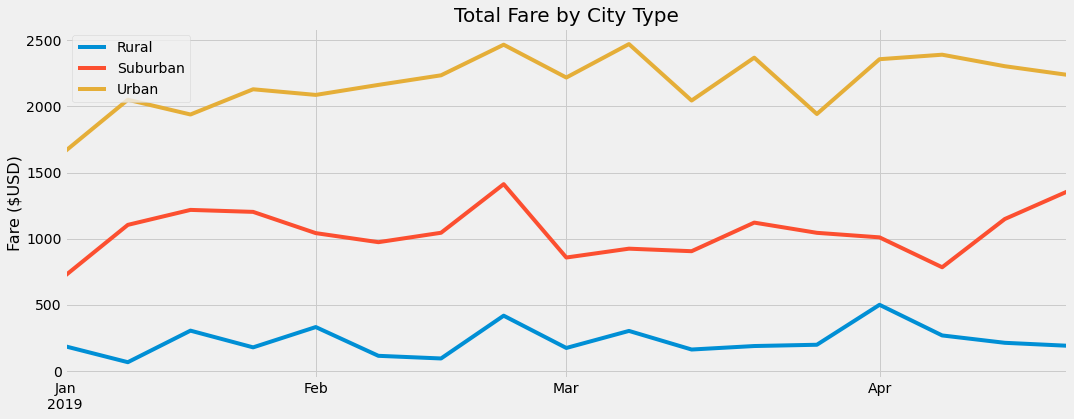

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style

week_jan_april_df.plot.line(figsize = (16,6))
plt.title("Total Fare by City Type", fontsize = 20)
plt.ylabel("Fare ($USD)", fontsize = 16)
plt.xlabel("")
plt.legend(loc= "upper left")
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("analysis/PyBer_fare_summary.png")
